# 1. Linear Regression

### Michael NANA KAMENI

This notebook contains examples accompanying the section on regression, and includes polynomial regression and overfitting.

Importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline 

## 1.1 Example 1: Linear Regression - Manually Estimating Parameters

Run the cell below, and adjust the sliders to set $m$ and $c$. Use this to answer Exercise VQ 7.1.2.1.

In [3]:
# some data to plot
xvals = np.arange(0.0, 50.0, 2.0)
yvals = [49.27787,54.81756,59.81878,52.21263,75.25958,88.22670,82.62580,81.36920,
     103.8306,90.49777,112.2656,114.0938,129.4082,127.9359,117.6020,150.7166,
     136.3856,149.1376,171.1495,157.3688,175.5486,192.3096,177.6935,191.4740,196.3582]

# show the points (x[] and y[]) and the line of best fit determined by y = mx + c, where 
# m is the gradient and c in the intercept (y value when x=0, or where the line crosses the y axis)
def plot_line(x, y, m, c):
    # The points
    plt.scatter(x, y,  c="g", alpha=0.5,label="Points")
    #The Line                      
    plt.plot(x, [m*x +c for x in x])
    # Labels etc
    plt.xlabel("X (Explanatory Variable)")
    plt.ylabel("Y (Dependant Variable)")
    plt.legend(loc=2)
    plt.ylim([0, 200])


Instead of calling our function `plot_line()` directly, we can use the following code to make it interactive. You do not need to know to do this, but it's a useful trick:

In [4]:
from ipywidgets import interact, fixed
import ipywidgets as widgets
interact(plot_line, x=fixed(xvals),y =fixed(yvals), m=(-5.0, 5.0), c=(0, 150.0));

interactive(children=(FloatSlider(value=0.0, description='m', max=5.0, min=-5.0), FloatSlider(value=75.0, desc…

## 1.2 Finding Line of best fit with Scikit-learn software

Scikit-learn has done a good job of standardizing the way models, like regression, are built, but some of the terminology may seem strange if you're not familiar with machine learning. In general, the procedure for creating and using a model follows these steps:
* Initialize the model - instantiating a model
* Train (fit) the model - using some training data to find model parameters. In the case of linear regression, this is finding the line of best fit
* Score the model - assessing how well it does
* Use the model to make predictions

We'll do this now, performing simple linear regression (one explanatory variable, one dependant variable) on some data.

The dataset is small, and was downloaded from http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html

No need to download it yourself - the relevant columns are copied into arrays so we can get going. A description of the data is available on the site. The columns we'll be looking at are:
* $X1$ = dollars/barrel crude oil (CRUDE)
* $X2$ = % interest on ten yr. U.S. treasury notes (INTEREST)
* $X6$ = purchasing power U.S. dollar (1983 base) (PP)
* $X7$ = consumer debt/billions of dollars (DEBT)

We'll try to predict the interest based on the other two variables

In [5]:
# The data 
CRUDE = [10.9, 12, 12.5, 17.7, 28.1,35.6, 31.8, 29, 28.6, 26.8, 14.6, 17.9] #X1
INTEREST = [7.61,7.42,8.41,9.44,11.46,13.91,13.00,11.11,12.44,10.62,7.68,8.38] #X2
PP = [1.76,1.65,1.53,1.38,1.22,1.10,1.03,1.00,0.96,0.93,0.91,0.88] #X6
DEBT = [234.40,263.80,308.30,347.50,349.40,366.60,381.10,430.40,511.80,592.40,646.10,685.50] #X7

### 1.2.1 Initializing the model

Let's get going:

In [6]:
# import model from Scikit-learn's sklearn library
from sklearn import linear_model

# initialize the model, and name it lr1
lr1 = linear_model.LinearRegression()

Before we can perform the next step, we need to make sure our input data is in the right format. 

The expected input is an array of input variables $X$ and an array of the same length with the corresponding outputs $Y$.

Because some models in `sklearn` can take multiple inputs, $X$ is not a simple 1D array, so calling 

`lr1.fit(X=CRUDE, y=INTEREST)` will not work. Instead, $X$ must be an array of arrays, with each array containing one or more input variables. So in out case, we want $X$ to look like
`[[c0], [c1], [c2], [c3]...]` where `cN` are the elements of `CRUDE`.

Below are two ways to turn `CRUDE` into an array of arrays.

In [7]:
# with the reshape function
INPUT = np.array(CRUDE).reshape(-1, 1)
INPUT

array([[10.9],
       [12. ],
       [12.5],
       [17.7],
       [28.1],
       [35.6],
       [31.8],
       [29. ],
       [28.6],
       [26.8],
       [14.6],
       [17.9]])

In [8]:
INPUT.shape

(12, 1)

In [9]:
# or using list comprehension
INPUT = [[c] for c in CRUDE]
INPUT

[[10.9],
 [12],
 [12.5],
 [17.7],
 [28.1],
 [35.6],
 [31.8],
 [29],
 [28.6],
 [26.8],
 [14.6],
 [17.9]]

### 1.2.2 Fitting the model

Now we can actually fit the data to the model - calculating model parameters based on $X$ and $Y$.

In [10]:
lr1.fit(X = INPUT,y = INTEREST)

# We can extract the model parameters:
print ("Intercept: ", lr1.intercept_)
print ("Coefficient: ",lr1.coef_)


Intercept:  4.525656862481598
Coefficient:  [0.25300233]


Finally, we can plot both the input data and the line of best fit as determined by the model.
Original data as scatter plot:

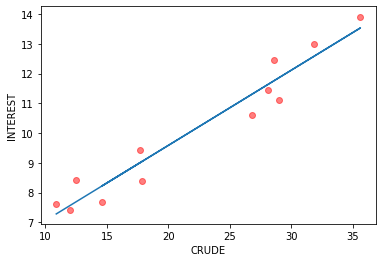

In [11]:
plt.scatter(CRUDE, INTEREST,  c="r", alpha=0.5,label="Crude")
# line of best fit. NB, doing this manually based on the parameters
plt.plot(CRUDE, [lr1.coef_*x +lr1.intercept_ for x in CRUDE]) # We could also use lr1.predict(x), as in next example
plt.xlabel("CRUDE")
plt.ylabel("INTEREST");

## Interpretation
When interest on ten yr. U.S. treasury notes growths, the dollars or barrel crude oil value increases on the market place.

### 1.2.3 Practice

For practice, try the same thing with the $x$ and $y$ values as in the first example and see how closely the calculated slope and intercept (model parameters) match your guess. The `xvals` has already been reshaped, so it can be passed into the `fit()` function as is.

In [12]:
xvals = np.arange(0.0, 50.0, 2.0).reshape(-1, 1)
yvals = [49.27787,54.81756,59.81878,52.21263,75.25958,88.22670,82.62580,81.36920,
     103.8306,90.49777,112.2656,114.0938,129.4082,127.9359,117.6020,150.7166,
     136.3856,149.1376,171.1495,157.3688,175.5486,192.3096,177.6935,191.4740,196.3582]

In [13]:
# fit the data
lr1.fit(xvals, yvals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# print intercept and coefficient
print ("Intercept: ", lr1.intercept_)
print ("Coefficient: ", lr1.coef_)

Intercept:  45.80778563076929
Coefficient:  [3.15364892]


Text(0, 0.5, 'y')

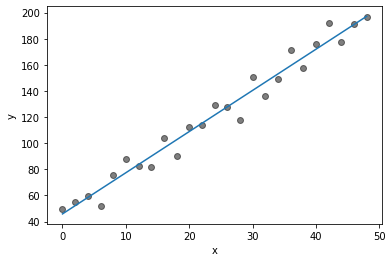

In [15]:
# plot the data and the prediction

# plot the data
plt.scatter(xvals, yvals, c='k', alpha =.5, label='x')

# line of best fit. that predicts the outcome
plt.plot(xvals, [lr1.coef_*x +lr1.intercept_ for x in xvals])
plt.xlabel("x")
plt.ylabel("y")

## 1.3 Multiple Regression

We aren't constrained to one input with scikit-learn - in fact most models assume multiple inputs. Let's continue with the data from the previous example. We'll choose another explanatory variable, $PP$, and then combine it with the oil price $CRUDE$ to build a more accurate model. Using just $PP$, we can see that the fit isn't great.

In [16]:
# initialize and train the model as we did before
lr2 = linear_model.LinearRegression()
lr2.fit(X = np.array(PP).reshape(-1, 1),y = INTEREST)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# intercept + coef
print("Intercept: ", lr2.intercept_)
print("Coef",lr2.coef_)

Intercept:  14.407632634335032
Coef [-3.58268931]


(0, 20)

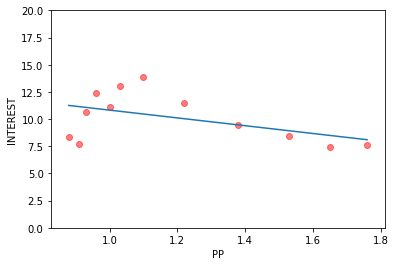

In [18]:
# plot
plt.scatter(PP, INTEREST,  c="r", alpha=0.5,label="")
# PP_new = np.array(PP).reshape(-1,1)
plt.plot(PP, [lr2.predict(np.array(x).reshape(1, 1)) for x in PP]) # Note - much easier than doing it manually
plt.xlabel("PP")
plt.ylabel("INTEREST")

# scaling the Y axis for clarity 
# Comment out this line. As you will see, matplotlib scales the Axis and it looks like the fit is bad
plt.ylim([0, 20]) 


__Now we'll build a model that uses both $CRUDE$ and $PP$ as inputs.__

Our input array should now look like this: `[[C1, P1], [C2, P2], [..]...]`

In [19]:
INPUT = [[CRUDE[i], PP[i]] for i in range(len(CRUDE))]

In [20]:
print(INPUT)

[[10.9, 1.76], [12, 1.65], [12.5, 1.53], [17.7, 1.38], [28.1, 1.22], [35.6, 1.1], [31.8, 1.03], [29, 1.0], [28.6, 0.96], [26.8, 0.93], [14.6, 0.91], [17.9, 0.88]]


Fit the model and print model parameters.

In [21]:
mlr1 = linear_model.LinearRegression()
mlr1.fit(X = INPUT,y = INTEREST)

# intercept + coef
print("Intercept: ", mlr1.intercept_)
print("Coef",mlr1.coef_)

Intercept:  2.2892177022311664
Coef [0.28216229 1.33068289]


Now, we could try to plot the result in 3D, or we could look at one axis at a time.


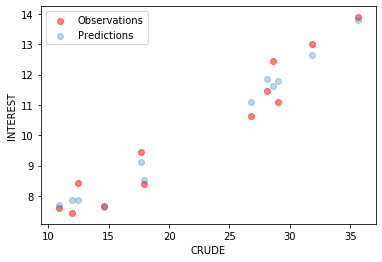

In [22]:
plt.scatter(CRUDE, INTEREST,  c="r", alpha=0.5,label="Observations") # Actual values
plt.scatter(CRUDE, [mlr1.predict([x]) for x in INPUT], alpha=0.3, label="Predictions"); # Predicted values
plt.xlabel('CRUDE')
plt.ylabel('INTEREST')
plt.legend()

## 1.4 Scoring Models

At this point, we need to find a better way of saying how well a model performs. "It looks OK" is good for developing intuition but not much else! Scikit-learn comes to the rescue with a handy `score()` method. Once we've developed a model, we can pass it a set of inputs and the correct outputs. In the case of regression, it will return a metric called the R-Squared measure. There's a more thorough explanation in the _LMS_. It is essentially a number quantifying how well the variation is explained by the model. Closer to one is better. Let's score the models we've made so far:

We could score `lr2` and `mlr1`, so for clarity let's redo the models from scratch. First, a simple linear regression model `slr` with one explanatory variable and output and a multiple regression model `mlr` with two input variables.

In [23]:
INPUT = [[c] for c in CRUDE]
slr = linear_model.LinearRegression()
slr.fit(X = INPUT,y = INTEREST)
print ('Simple regression model score\t', slr.score(INPUT, INTEREST))

INPUT = [[CRUDE[i], PP[i]] for i in range(len(CRUDE))]
mlr = linear_model.LinearRegression()
mlr.fit(X = INPUT,y = INTEREST);
print ('Multiple regression model score\t', mlr.score(INPUT, INTEREST))

Simple regression model score	 0.9396988835518667
Multiple regression model score	 0.9599290494693168


Notice, the multiple regression model does slightly better. In most real world examples, scores will be lower and adding variables can help more dramatically.

Worth noting: The score function here was given the same data we used to make the model. This is dangerous - we may end up with a model that fits the training data _too_ well, but is inaccurate for any new data. This is called overfitting, and will be explored a bit later. Small datasets or too many input variables can be causes of overfitting.

## 1.5 Polynomial Regression

To capture more complex curves, we can include higher order terms. To do this, we simply compute a new input. For example, given an input $X$, we can add a second input that is $X^2$. We'll illustrate this using one of the built-in datasets that comes with scikit-learn.

Scikit-learn comes with a lot of datasets that we can use to hone our skills. For example, the Boston housing data:

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [25]:
#print(boston.DESCR)

In [26]:
boston.data.shape

(506, 13)

In [27]:
# turn the boston data into a Pandas Dataframe
bost = pd.DataFrame(boston.data)
bost.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
bost.shape

(506, 13)

With this new dataset, let's look at some scatter plots to see what interesting relationships might be present. A brief diversion - take a look at these two features that had a high correlation coefficient:

Correlation with outliers: 0.9102281885331822 (506, 13)


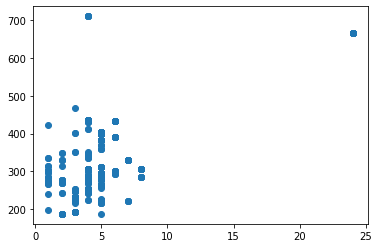

In [29]:
# 
plt.scatter(bost[8], bost[9]) # check it out visually - some dangerous outliers! 
# these two are apparently highly correlated
print ("Correlation with outliers:", bost.corr()[8][9], bost.shape)

Notice the two outliers. We'll make a new dataframe without those two outliers. Watch how the correlation drops from 0.91 to 0.25!


Correlation without outliers: 0.24975731331429227 (369, 13)


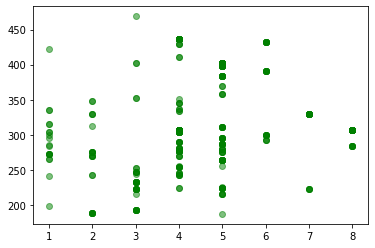

In [30]:
bost2 = bost.loc[bost[9]<600]
plt.scatter(bost2[8], bost2[9], color='g', alpha=.5)
print ("Correlation without outliers:", bost2.corr()[8][9], bost2.shape)

Something weird is going on there that would bear further investigation. For now, we're just looking for examples so we'll move on.

Features or variables `bost[4]` and `bost[7]` have a more interesting relationship that doesn't look entirely linear, and `bost[6]` and `bost[7]` also show some sort of trend:

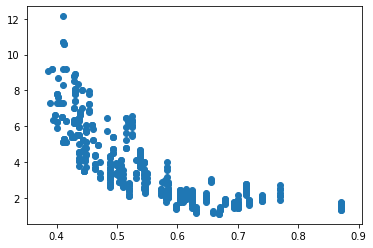

In [31]:
plt.scatter(bost[4], bost[7])

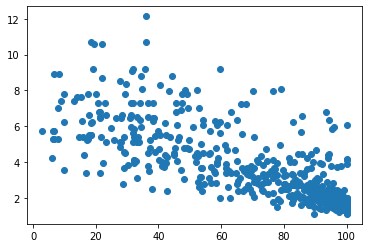

In [32]:
plt.scatter(bost[6], bost[7])

If we were trying to predict the 7th variable here, we could use both the 4th and 6th to try and get a better prediction. Let's plot `bost[4]` and `bost[7]` using a simple linear regression model.

Intercept:  11.54874968094815
Coef [-13.97832352]
Score:  0.59171496709342


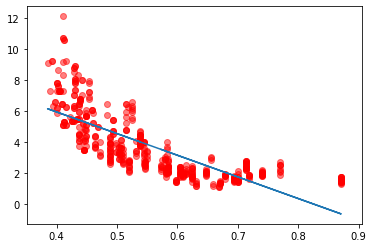

In [33]:
lr = linear_model.LinearRegression()
lr.fit(X = bost[4].values.reshape(-1, 1),y = bost[7])

# intercept + Coef
print("Intercept: ", lr.intercept_)
print("Coef",lr.coef_)
print("Score: ",lr.score(X = bost[4].values.reshape(-1, 1), y = bost[7]))


# plot
plt.scatter(bost[4], bost[7],  c="r", alpha=0.5,label="DEBT")
plt.plot(bost[4], [lr.predict(np.array(x).reshape(-1,1)) for x in bost[4]])

Now let's add the squared term. Let's look at `bost[4]`. The squared term is `bost[4]*bost[4]` (or in Pythonic terms `bost[4][i]**2`. Then add it as a second input. 

Intercept:  28.743491575903057
Coef [-74.16719933  50.42774842]
Score:  0.735720699247701


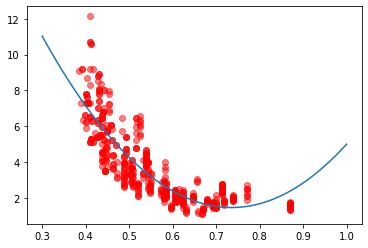

In [34]:
# list comprehension to calculate the squared term of bost[4] and add it to In_vars
In_vars = [[bost[4][i], bost[4][i]**2] for i in range(len(bost[4]))] # [b, b^2] 

lr = linear_model.LinearRegression()
lr.fit(X = In_vars,y = bost[7])

# intercept + Coef
print("Intercept: ", lr.intercept_)
print("Coef", lr.coef_)
print("Score: ", lr.score(X = In_vars,y = bost[7]))


# plot
plt.scatter(bost[4], bost[7],  c="r", alpha=0.5,label="")
X = np.linspace(0.3, 1, 100)
plt.plot(X, [lr.predict([[x, x**2]]) for x in X])

Now let's add a third order and fourth order term, i.e., `bost[4]**3` and `bost[4]**4`.

Intercept:  33.65354883397314
Coef [ -59.46395113 -109.3724554   306.14832218 -172.98105222]
Score: 0.7529407350205493


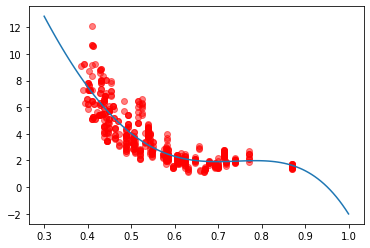

In [35]:
# Adding ^3 and ^4 terms
In_vars = [[bost[4][i], bost[4][i]**2, bost[4][i]**3, bost[4][i]**4] for i in range(len(bost[4]))]

lr = linear_model.LinearRegression()
lr.fit(X = In_vars,y = bost[7])

# Intercept + Coef
print("Intercept: ", lr.intercept_)
print("Coef",lr.coef_)
print("Score:", lr.score(X = In_vars,y = bost[7]))


#Plot
plt.scatter(bost[4], bost[7],  c="r", alpha=0.5,label="")
X = np.linspace(0.3, 1, 100)
plt.plot(X, [lr.predict([[x, x**2, x**3, x**4]]) for x in X])

Our model is getting better and better as the scores reflect.


Higher order polynomials can get long and it is easy to make mistakes. Also, when taking in more than one variable as input, you need extra terms $x1^2, x1^3,\ldots$. The [sklearn library](http://scikit-learn.org/stable/modules/preprocessing.html) (see section 4.3.7) has a module that automatically creates  higher order terms given the degree of the polynomial.

In [36]:
# 
from sklearn.preprocessing import PolynomialFeatures

Create a polynomial of degree 5. This means we'll have variables of the form $x, x^2, x^3, x^4, x^5$.

In [37]:
polyF = PolynomialFeatures(degree=5)

[1.         0.469      0.219961   0.10316171 0.04838284 0.02269155]
Intercept:  505.0076653083257
Coef [     0.          -4150.5235434   13851.87045932 -23105.4899768
  19116.52160216  -6247.1274691 ]
Score 0.757658368116051


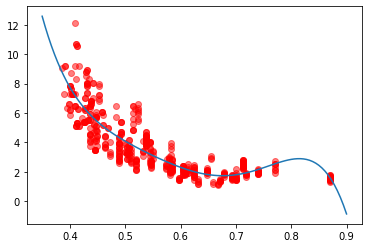

In [38]:
X = [[b] for b in bost[4]] # instead of [b1, b2...] we get [[b1], [b2] ...] - equivalent to the .reshape() we used
X_p = polyF.fit_transform(X)
print(X_p[1]) # 1, x, x**2, x**3, x**4, x**5

# we can use this to build the model
lr = linear_model.LinearRegression()
lr.fit(X = X_p,y = bost[7])

# intercept + coef
print("Intercept: ", lr.intercept_)
print("Coef",lr.coef_)
print("Score", lr.score(X = X_p,y = bost[7]))

# plot
plt.scatter(bost[4], bost[7],  c="r", alpha=0.5,label="")
X = np.linspace(0.35, 0.9, 100)
plt.plot(X, [lr.predict([[x**i for i in range(5+1)]]) for x in X])

We can combine polynomial regression with multiple regression. We take the two, or more, input variables and generate polynomial terms. `PolynomialFeatures` will handle creation of the cross terms (see LMS for explanation of what these are). We get a model that scores even better.

[1.00000000e+00 4.69000000e-01 7.89000000e+01 2.19961000e-01
 3.70041000e+01 6.22521000e+03 1.03161709e-01 1.73549229e+01
 2.91962349e+03 4.91169069e+05]
Intercept:  57.874029460444966
Coef [ 0.00000000e+00 -2.40525351e+02  8.39841688e-02  3.72673431e+02
 -5.69062825e-01  1.09792995e-03 -2.18864867e+02  1.12917147e+00
 -5.98200801e-03  1.16554706e-05]
Score 0.7646566850222247
(506, 10)
(506,)


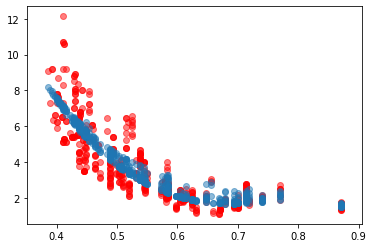

In [39]:
polyF = PolynomialFeatures(degree=3)
X = [[ bost[4][i], bost[6][i]] for i in range(len(bost[4]))] # <<<<<
X_p = polyF.fit_transform(X)
print(X_p[1])

# we can use this to build the model
lr = linear_model.LinearRegression()
lr.fit(X = X_p,y = bost[7])

# intercept + coef
print("Intercept: ", lr.intercept_)
print("Coef",lr.coef_)
print("Score", lr.score(X = X_p,y = bost[7]))

# plot
plt.scatter(bost[4], bost[7],  c="r", alpha=0.5,label="")
X = np.linspace(0.35, 0.9, 100)
print(X_p.shape)
print(lr.predict(X_p).shape)

plt.scatter(bost[4], lr.predict(X_p),alpha=0.5);

In [40]:
# Replace numbers in column names by the feature names.
bost.columns = boston.feature_names
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
# mkdir homebrew && curl -L https://github.com/Homebrew/brew/tarball/master | tar xz --strip 1 -C homebrew

In [42]:
#!pip install Wand

In [43]:
#!python -m pip install pip_magic

In [44]:
# from IPython.core.magic import register_line_magic

In [45]:
#!pip install ggplot

In [46]:
# conda install pandas

## Practice on your own

This time we'll use another dataset available from another library:

In [47]:
#To import mtcars, I have changed from pandas.lib import Timestamp to pandas._libs.tslib import Timestamp
from ggplot import mtcars
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


a) Use simple linear regression to model the relationship between car weight $wt$ and fuel efficiency $mpg$. Use $mpg$ as the dependant variable. Plot a scatter plot and the line of best fit.

Text(0.5, 1.0, 'Weight distribution')

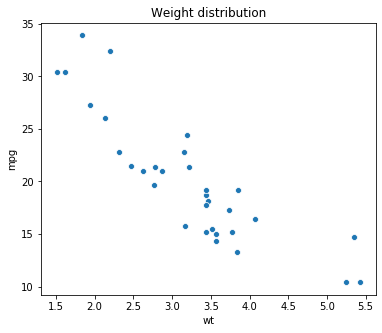

In [48]:
# Let's have look at the distribution of weight
import seaborn as sns
plt.figure(figsize=(6,5))
sns.scatterplot(data= mtcars, x='wt', y= 'mpg')
plt.title("Weight distribution")

The scatterplot shows a roughly linear relationship between weight and mpg, suggesting a linear regression model might work well.

In [49]:
# Define a function remove outlier from data set
def remove_outlier(df_in, column_name):
    first_quartile = df_in[column_name].quantile(0.25)
    third_quartile = df_in[column_name].quantile(0.75)
    iqr = third_quartile - first_quartile # Interquartile range
    fence_low = first_quartile - 1.5*iqr
    fence_high = third_quartile + 1.5*iqr
    data_out = df_in.loc[(df_in[column_name] > fence_low) & (df_in[column_name] < fence_high)]
    return data_out

# Remove outlier from weight
mtcars_filtered = remove_outlier(mtcars, "wt")

Text(0.5, 1.0, 'Weight distribution')

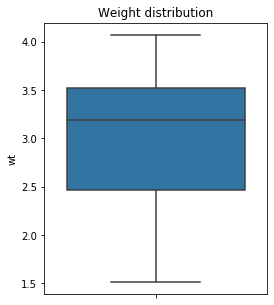

In [50]:
plt.figure(figsize=(4,5))
sns.boxplot(data= mtcars_filtered, x='wt', orient='v')
plt.title("Weight distribution")

Text(0.5, 1.0, 'Fuel efficiency distribution')

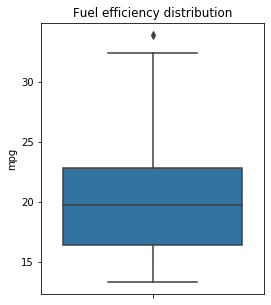

In [51]:
plt.figure(figsize=(4,5))
sns.boxplot(data= mtcars_filtered, x='mpg', orient='v')
plt.title("Fuel efficiency distribution")

In [52]:
# Remove outlier from weight
mtcars_filtered = remove_outlier(mtcars_filtered, "mpg")
type(mtcars_filtered)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Fuel efficiency distribution')

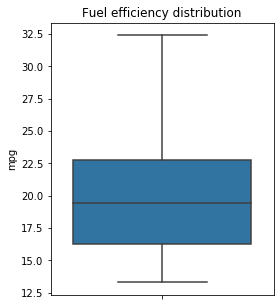

In [53]:
plt.figure(figsize=(4,5))
sns.boxplot(data= mtcars_filtered, x='mpg', orient='v')
plt.title("Fuel efficiency distribution")

In [54]:
# Use simple linear regression to model the relationship between car weight wt and fuel efficiency 𝑚𝑝𝑔

# Import useful libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define variables
X = np.array(mtcars_filtered['wt']).reshape(-1,1)
y = mtcars_filtered['mpg']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state = 0)

# Use our model to train data
model = linear_model.LinearRegression()
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# Print out the model parameters 
print ("Intercept: ", model.intercept_)
print ("Coefficient: ", model.coef_)

Intercept:  39.78033939267429
Coefficient:  [-6.42705721]


The output above shows the model intercept and coefficients used to create the best fit line. In this case the y-intercept term is set to 39.78 and the coefficient for the weight variable is -6.43. In other words, the model fit the line $mpg = 39.78 - 6.43\times wt$.

In [56]:
# Print out score
metric_r_square_measure = model.score(X_test, y_test)
print("Coefficient of determination: " + str(metric_r_square_measure))

Coefficient of determination: 0.6700698276433061


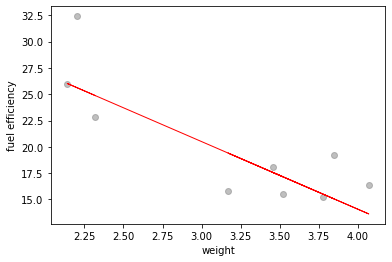

In [57]:
# Plot a scatter plot and the line of best fit.
plt.scatter(X_test, y_test, c = 'gray', alpha=.5, label= '')
plt.plot(X_test, [model.predict([x]) for x in X_test], color ='r', linewidth=1, label ='Prediction')
plt.xlabel('weight')
plt.ylabel('fuel efficiency')
plt.show()

## Interpretation
There is a strong negative correlation between <b>weight</b> and <b>fuel efficiency</b>. That means when <b>fuel efficiency</b> increases,  <b>weight</b> decreases,  and inversely  <b>fuel efficiency</b> decreases, <b>weight</b> increases.

In [58]:
# Predicting the score accuracy
y_pred = model.predict(X_test)
mean_squared_error =np.mean((y_pred - y_test)**2)
print("Root Mean Squared Error:", np.sqrt(mean_squared_error))

Root Mean Squared Error: 3.1781038068822856


## Interpretation
The great number of mean square error could be justified by the amoung of points in the data set. 

b) Now add a squared term of the independent variable. Does the model score increase?

In [64]:
# list comprehension to calculate the squared term of bost[4] and add it to In_vars
X = pd.DataFrame([mtcars['wt'], mtcars['wt']**2]).T # [b, b^2] 
y = mtcars['mpg']

# Train our model
from sklearn.preprocessing import PolynomialFeatures

polyF = PolynomialFeatures(degree=2)
Poly_Feat = polyF.fit_transform(X)

print(Poly_Feat[1])

# Fitting model
lr = linear_model.LinearRegression()
lr.fit(Poly_Feat, y)

# print out parameters
print("Intercept: ", lr.intercept_)
print("Coef", lr.coef_)

# Print out the score
print("Score", lr.score(Poly_Feat, y))


[ 1.          2.875       8.265625    8.265625   23.76367188 68.32055664]
Intercept:  14.455833054770622
Coef [  0.          36.61945631 -11.85087865 -11.85087865   5.20042113
  -0.38627878]
Score 0.8219709873435177


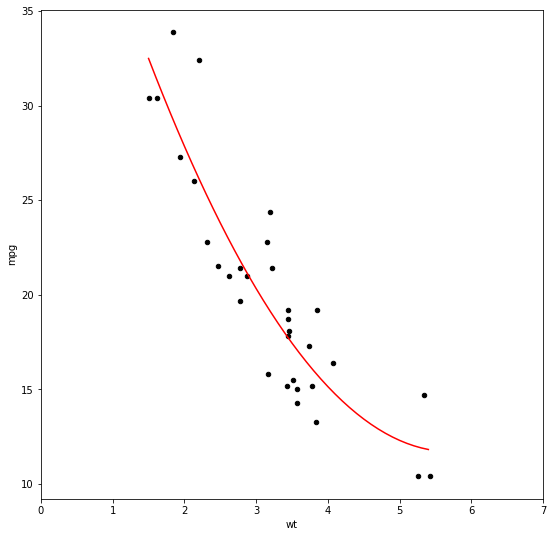

In [66]:
# Plot the curve from 1.5 to 5.5
line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([line_range,
                               line_range**2]).T

# Train the model using the new_cars data
lr.fit(X,
       y = mtcars["mpg"])

# Get corresponding y values from the model
y_values = lr.predict(X = poly_predictors)


mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(line_range,   # X-axis range
         y_values,          # Predicted values
         color="r")

In [67]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           # Include weight
                           mtcars["wt"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept: " + str(poly_model.intercept_))

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients: " + str(poly_model.coef_))

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept: 49.930810949451796
Model Coefficients: [-13.38033708   1.17108689]


0.8190613581384094

The output shows us that including the weight squared term appears to improve the model's performance because the R-squared increased from 0.75 to 0.8190. It should be noted, however, that adding more variables to a linear regression model can never cause R-squared to decrease, so we only want to add variables if there is a substantial improvement in performance.
Let's plot the curved line defined by the new model to see if the fit looks better than the old one. To start off, let's create a function that takes an array of x values, model coefficients and an intercept term and returns the x values and fitted y values corresponding to those x values.


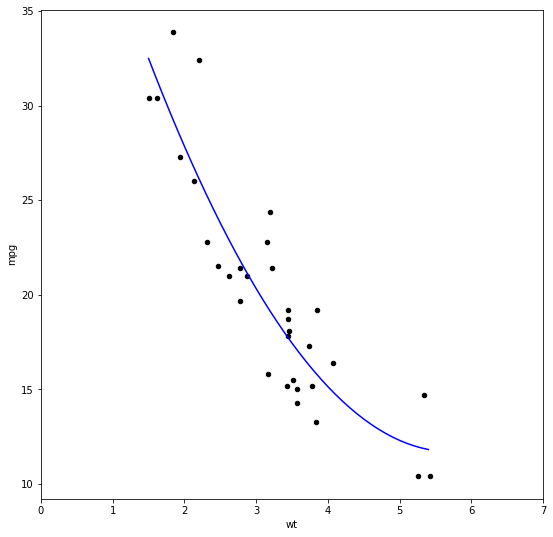

In [68]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue")

The quadratic function seems to fit the data a little better than the linear one. Let's investigate further by using the new model to make predictions on the original data and check the root mean squared error:

In [ ]:
preds = poly_model.predict(X=predictors)

rmse = np.sqrt(mean_squared_error(preds, mtcars['mpg']))
rmse

c) Add a second variable, power $hp$. Take a look at a scatter plot and decide if squared term is needed. In deciding, looking at the scores for the models.

If you get stuck, check out http://hamelg.blogspot.co.za/2015/11/python-for-data-analysis-part-27-linear.html - they work through linear regression on this dataset in some detail. 